In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
path="/content/drive/MyDrive/spam_ham_dataset.csv"
given_mail_data = pd.read_csv(path)
print(given_mail_data)


      Unnamed: 0 label                                               text  \
0            605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1           2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2           3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3           4685  spam  Subject: photoshop , windows , office . cheap ...   
4           2030   ham  Subject: re : indian springs\r\nthis deal is t...   
...          ...   ...                                                ...   
5166        1518   ham  Subject: put the 10 on the ft\r\nthe transport...   
5167         404   ham  Subject: 3 / 4 / 2000 and following noms\r\nhp...   
5168        2933   ham  Subject: calpine daily gas nomination\r\n>\r\n...   
5169        1409   ham  Subject: industrial worksheets for august 2000...   
5170        4807  spam  Subject: important online banking alert\r\ndea...   

      label_num  
0             0  
1             0  
2             0  
3  

In [ ]:
ham=given_mail_data['label'].value_counts()
print(ham)


ham     3672
spam    1499
Name: label, dtype: int64


In [ ]:
import numpy as np
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn import metrics


In [ ]:
mail_data = given_mail_data.where((pd.notnull(given_mail_data)),' ')
mail_data.head()
mail_data.loc[mail_data['label'] == 'spam', 'label',] = 1
mail_data.loc[mail_data['label'] == 'ham', 'label',] = 0



In [ ]:
X=mail_data['text']
Y=mail_data['label_num']
#print(X)
#print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)
print((Y_test))
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("Y_train: ", Y_train.shape)
print("Y_test: ", Y_test.shape)



3080    0
794     0
1956    1
3451    1
2131    1
       ..
4939    0
1151    0
988     1
670     0
2309    1
Name: label_num, Length: 1552, dtype: int64
X_train:  (3619,)
X_test:  (1552,)
Y_train:  (3619,)
Y_test:  (1552,)


finding accuracy and prediciting.

In [ ]:
from sklearn.metrics import confusion_matrix

Vectorizer = CountVectorizer()
count= Vectorizer.fit_transform(X_train.values)
print(count)

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

X_train_count=Vectorizer.fit_transform(X_train.values)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
print(Y_train)
Y_test = Y_test.astype('int')
model = LogisticRegression()

model.fit(X_train_features, Y_train)
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

print('Accuracy on training data : ', accuracy_on_training_data)
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
print('Accuracy on test data : ', accuracy_on_test_data)

input_mail = [" i know that this time of the year is  extremely hectic"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)

if (prediction[0]==1):
     print('Spam mail')

else:
    print('Ham mail')




  (0, 35877)	1
  (0, 10699)	4
  (0, 29522)	3
  (0, 13014)	3
  (0, 16562)	3
  (0, 36923)	7
  (0, 19642)	2
  (0, 7259)	2
  (0, 17573)	2
  (0, 28939)	3
  (0, 28195)	2
  (0, 40115)	1
  (0, 13315)	1
  (0, 38449)	1
  (0, 25813)	1
  (0, 22272)	1
  (0, 1374)	1
  (0, 35390)	1
  (0, 20890)	2
  (0, 40918)	2
  (0, 19677)	1
  (0, 5168)	1
  (0, 28194)	1
  (0, 40929)	4
  (0, 25277)	1
  :	:
  (3618, 16427)	1
  (3618, 36801)	1
  (3618, 11734)	1
  (3618, 22549)	1
  (3618, 17520)	1
  (3618, 11735)	1
  (3618, 12816)	1
  (3618, 26239)	2
  (3618, 37968)	1
  (3618, 23922)	1
  (3618, 25922)	1
  (3618, 27931)	2
  (3618, 30421)	1
  (3618, 36249)	1
  (3618, 31613)	1
  (3618, 5824)	1
  (3618, 11393)	1
  (3618, 12301)	1
  (3618, 25266)	1
  (3618, 20759)	1
  (3618, 20114)	2
  (3618, 40385)	1
  (3618, 20893)	1
  (3618, 37359)	1
  (3618, 21813)	1
4294    0
3589    1
3681    0
2186    0
3904    0
       ..
3752    0
1759    1
3221    0
1980    0
3998    0
Name: label_num, Length: 3619, dtype: int64
Accuracy on trainin

confusion matrix

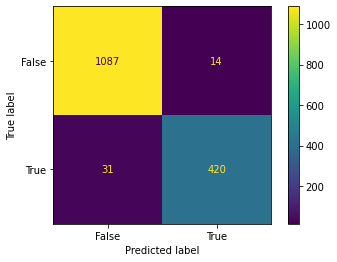

In [ ]:
clf = MultinomialNB()
targets = Y_train.values
clf.fit(count, targets)

y_predict = clf.predict(Vectorizer.transform(X_test))
y_proab=clf.predict_proba(Vectorizer.transform(X_test))[:,1]
confusion_matrix (Y_test , y_predict)
actual=Y_test
pred=y_predict
cm=metrics.confusion_matrix(actual,pred)
from sklearn.metrics import ConfusionMatrixDisplay
display=metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
display.plot();


In [ ]:
print(confusion_matrix(Y_test,prediction_on_test_data))

[[1071   16]
 [  12  453]]


plots of threshold vs specificity , sensitivity and accuracy


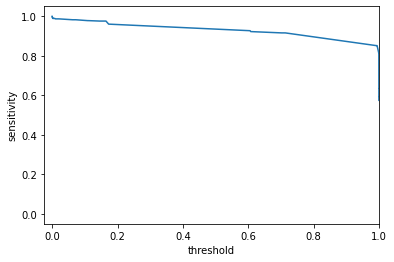

In [ ]:
from sklearn import metrics
specificity=[]
fpr,tpr,thresholds=metrics.roc_curve(Y_test,y_proab)
#tn,fp,fn,tp=confusion_matrix(Y_test,y_predict)

for ele in fpr:
  specificity.append(1-ele)

plt.xlabel('threshold')
plt.ylabel('sensitivity')
plt.xlim([-0.025,1])
plt.plot(thresholds,tpr)
plt.show()



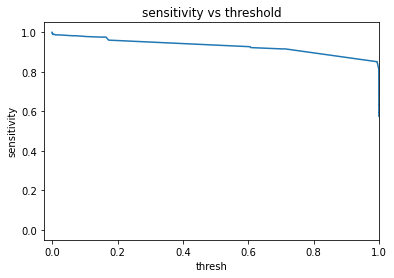

In [ ]:
specificity=[]
fpr,tpr,thresholds=metrics.roc_curve(Y_test,y_proab)
#tn,fp,fn,tp=confusion_matrix(Y_test,y_predict)

for ele in fpr:
  specificity.append(1-ele)

plt.xlabel('thresh')
plt.ylabel('sensitivity')
plt.xlim([-0.025,1])
plt.plot(thresholds,tpr)
plt.title('sensitivity vs threshold')
plt.show()



451
81
81


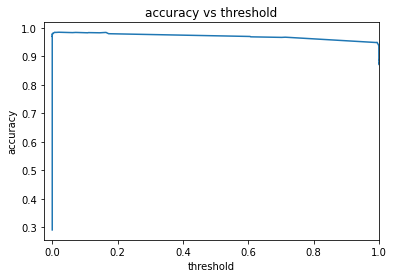

In [ ]:
tn,fp,fn,tp=cm.ravel()
totalpos=tp+fn
print(totalpos)
totalneg=tn+fp
total=totalneg+totalpos
TP=[]
TN=[]
accuracy=[]
for ele in specificity:
  TN.append(ele*totalneg)
print(len(TN))
for ele in tpr:
  TP.append(ele*totalpos)
print(len(TP))
for i in range(len(fpr)):
  accuracy.append((TN[i]+TP[i])/total)

plt.xlabel('threshold')
plt.ylabel('accuracy')
plt.xlim([-0.025,1])
plt.title('accuracy vs threshold')
plt.plot(thresholds,accuracy)
plt.show()


In [ ]:
Accuracy = metrics.accuracy_score(actual, pred)
print((Accuracy*100),'%')


97.48711340206185 %


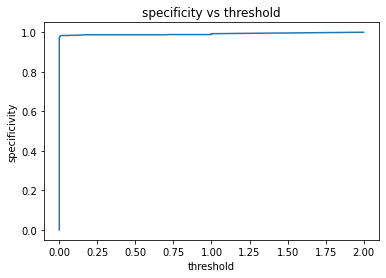

In [ ]:
specificity=[]
for ele in fpr:
  specificity.append(1-ele)

plt.xlabel('threshold')
plt.ylabel ('specificivity')
plt.plot(thresholds,specificity)
plt.title('specificity vs threshold')
plt.show()
